In [41]:
from tensorflow.keras.layers import Input, SimpleRNN, GRU, LSTM, Dense, Flatten, GlobalMaxPool1D

from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam
import tensorflow as tf

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
tf.debugging.set_log_device_placement(True)

In [42]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [46]:
from tensorflow.python.client import device_lib 
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 8011464610539430308
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 3142752665
locality {
  bus_id: 1
  links {
  }
}
incarnation: 5993709338105374995
physical_device_desc: "device: 0, name: GeForce GTX 1050, pci bus id: 0000:01:00.0, compute capability: 6.1"
]


#### liner model 

In [33]:
T = 40
D = 1
X = []
Y = []

def get_label(x, i1, i2, i3):
  # x = sequence
  if x[i1] < 0 and x[i2] < 0 and x[i3] < 0:
    return 1
  if x[i1] < 0 and x[i2] > 0 and x[i3] > 0:
    return 1
  if x[i1] > 0 and x[i2] < 0 and x[i3] > 0:
    return 1
  if x[i1] > 0 and x[i2] > 0 and x[i3] < 0:
    return 1
  return 0

for t in range(5000):
    x = np.random.randn(T)
    X.append(x)
    y = get_label(x, 1, 2, 3) # short distance
    #   y = get_label(x, 0, 1, 2) # long distance
    Y.append(y)

X = np.array(X)
Y = np.array(Y)
N = len(X)

In [30]:
i = Input(shape= (T,))
x = Dense(1, activation='sigmoid')(i)
model= Model(i,x)
model.compile(loss= 'binary_crossentropy', optimizer = Adam(lr = 0.01), metrics = ["accuracy"])

r = model.fit(X,Y , epochs = 100 , validation_split = 0.5)


Train on 2500 samples, validate on 2500 samples
Epoch 1/100
2500/2500 [==============================] - 1s 416us/sample - loss: 0.7732 - accuracy: 0.5140 - val_loss: 0.7158 - val_accuracy: 0.4944
Epoch 2/100
2500/2500 [==============================] - 1s 238us/sample - loss: 0.6973 - accuracy: 0.5336 - val_loss: 0.7189 - val_accuracy: 0.4836
Epoch 3/100
2500/2500 [==============================] - 1s 233us/sample - loss: 0.6973 - accuracy: 0.5192 - val_loss: 0.7151 - val_accuracy: 0.4956
Epoch 4/100
2500/2500 [==============================] - 1s 245us/sample - loss: 0.6978 - accuracy: 0.5388 - val_loss: 0.7174 - val_accuracy: 0.4932
Epoch 5/100
2500/2500 [==============================] - 1s 231us/sample - loss: 0.6966 - accuracy: 0.5360 - val_loss: 0.7157 - val_accuracy: 0.4940
Epoch 6/100
2500/2500 [==============================] - 1s 243us/sample - loss: 0.6960 - accuracy: 0.5404 - val_loss: 0.7125 - val_accuracy: 0.4956
Epoch 7/100
2500/2500 [==============================] - 1

2500/2500 [==============================] - 1s 245us/sample - loss: 0.6999 - accuracy: 0.5348 - val_loss: 0.7141 - val_accuracy: 0.5012
Epoch 56/100
2500/2500 [==============================] - 1s 220us/sample - loss: 0.6969 - accuracy: 0.5524 - val_loss: 0.7126 - val_accuracy: 0.5008
Epoch 57/100
2500/2500 [==============================] - 1s 247us/sample - loss: 0.6971 - accuracy: 0.5388 - val_loss: 0.7147 - val_accuracy: 0.4888
Epoch 58/100
2500/2500 [==============================] - 1s 243us/sample - loss: 0.6993 - accuracy: 0.5448 - val_loss: 0.7169 - val_accuracy: 0.4936
Epoch 59/100
2500/2500 [==============================] - 1s 229us/sample - loss: 0.6994 - accuracy: 0.5376 - val_loss: 0.7140 - val_accuracy: 0.5044
Epoch 60/100
2500/2500 [==============================] - 1s 227us/sample - loss: 0.6971 - accuracy: 0.5424 - val_loss: 0.7160 - val_accuracy: 0.4952
Epoch 61/100
2500/2500 [==============================] - 1s 228us/sample - loss: 0.6981 - accuracy: 0.5408 - val

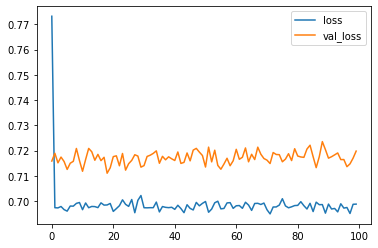

In [31]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

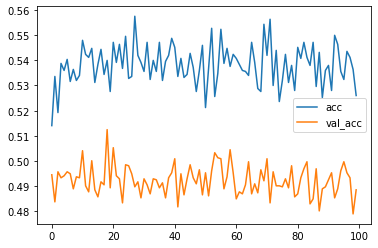

In [32]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

#### simpleRNN

In [34]:
print(X.shape)
inputs = np.expand_dims(X, -1)
i = Input(shape = (T,D))
print(inputs.shape)
x = SimpleRNN(5)(i)
x = Dense(1, activation = "sigmoid")(x)
model = Model(i, x)

model.compile(loss = "binary_crossentropy",optimizer = Adam(lr = 0.01),metrics = ["accuracy"])
r = model.fit(inputs, Y , epochs = 100, validation_split = 0.5 )

(5000, 40)
(5000, 40, 1)
Train on 2500 samples, validate on 2500 samples
Epoch 1/100
2500/2500 [==============================] - 7s 3ms/sample - loss: 0.7030 - accuracy: 0.5104 - val_loss: 0.6941 - val_accuracy: 0.5032
Epoch 2/100
2500/2500 [==============================] - 5s 2ms/sample - loss: 0.6929 - accuracy: 0.5164 - val_loss: 0.6957 - val_accuracy: 0.5072
Epoch 3/100
2500/2500 [==============================] - 4s 2ms/sample - loss: 0.6944 - accuracy: 0.5144 - val_loss: 0.6950 - val_accuracy: 0.5020
Epoch 4/100
2500/2500 [==============================] - 3s 1ms/sample - loss: 0.6928 - accuracy: 0.5148 - val_loss: 0.6951 - val_accuracy: 0.5128
Epoch 5/100
2500/2500 [==============================] - 3s 1ms/sample - loss: 0.6922 - accuracy: 0.5244 - val_loss: 0.6961 - val_accuracy: 0.5124
Epoch 6/100
2500/2500 [==============================] - 3s 1ms/sample - loss: 0.6936 - accuracy: 0.5012 - val_loss: 0.6944 - val_accuracy: 0.5172
Epoch 7/100
2500/2500 [======================

Epoch 56/100
2500/2500 [==============================] - 4s 1ms/sample - loss: 0.6903 - accuracy: 0.5320 - val_loss: 0.6954 - val_accuracy: 0.5168
Epoch 57/100
2500/2500 [==============================] - 4s 1ms/sample - loss: 0.6913 - accuracy: 0.5252 - val_loss: 0.6955 - val_accuracy: 0.5176
Epoch 58/100
2500/2500 [==============================] - 4s 1ms/sample - loss: 0.6901 - accuracy: 0.5296 - val_loss: 0.6972 - val_accuracy: 0.5004
Epoch 59/100
2500/2500 [==============================] - 4s 1ms/sample - loss: 0.6927 - accuracy: 0.5188 - val_loss: 0.6938 - val_accuracy: 0.5024
Epoch 60/100
2500/2500 [==============================] - 4s 1ms/sample - loss: 0.6929 - accuracy: 0.5200 - val_loss: 0.6941 - val_accuracy: 0.5056
Epoch 61/100
2500/2500 [==============================] - 4s 1ms/sample - loss: 0.6941 - accuracy: 0.5092 - val_loss: 0.6938 - val_accuracy: 0.5084
Epoch 62/100
2500/2500 [==============================] - 4s 1ms/sample - loss: 0.6924 - accuracy: 0.5128 - val_

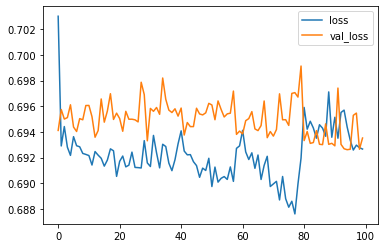

In [35]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

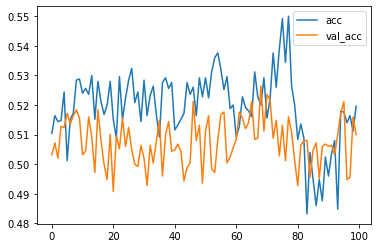

In [36]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

#### LSTM

In [37]:
print(X.shape)
inputs = np.expand_dims(X, -1)
i = Input(shape = (T,D))
print(inputs.shape)
x = LSTM(5, return_sequences=True)(i)
x = GlobalMaxPool1D()(x)
x = Dense(1, activation = "sigmoid")(x)
model = Model(i, x)

model.compile(loss = "binary_crossentropy",optimizer = Adam(lr = 0.01),metrics = ["accuracy"])
r = model.fit(inputs, Y , epochs = 100, validation_split = 0.5 )

(5000, 40)
(5000, 40, 1)
Train on 2500 samples, validate on 2500 samples
Epoch 1/100
2500/2500 [==============================] - 12s 5ms/sample - loss: 0.6933 - accuracy: 0.5028 - val_loss: 0.6926 - val_accuracy: 0.5072
Epoch 2/100
2500/2500 [==============================] - 1s 481us/sample - loss: 0.6928 - accuracy: 0.5124 - val_loss: 0.6927 - val_accuracy: 0.5088
Epoch 3/100
2500/2500 [==============================] - 1s 483us/sample - loss: 0.6928 - accuracy: 0.5184 - val_loss: 0.6952 - val_accuracy: 0.5068
Epoch 4/100
2500/2500 [==============================] - 1s 467us/sample - loss: 0.6922 - accuracy: 0.5152 - val_loss: 0.6922 - val_accuracy: 0.5140
Epoch 5/100
2500/2500 [==============================] - 1s 427us/sample - loss: 0.6907 - accuracy: 0.5196 - val_loss: 0.6939 - val_accuracy: 0.4944
Epoch 6/100
2500/2500 [==============================] - 1s 435us/sample - loss: 0.6904 - accuracy: 0.5348 - val_loss: 0.6941 - val_accuracy: 0.5152
Epoch 7/100
2500/2500 [===========

2500/2500 [==============================] - 1s 465us/sample - loss: 0.6700 - accuracy: 0.5744 - val_loss: 0.7259 - val_accuracy: 0.5096
Epoch 56/100
2500/2500 [==============================] - 1s 454us/sample - loss: 0.6641 - accuracy: 0.5812 - val_loss: 0.7249 - val_accuracy: 0.5188
Epoch 57/100
2500/2500 [==============================] - 1s 436us/sample - loss: 0.6627 - accuracy: 0.5912 - val_loss: 0.7319 - val_accuracy: 0.5076
Epoch 58/100
2500/2500 [==============================] - 1s 426us/sample - loss: 0.6696 - accuracy: 0.5848 - val_loss: 0.7230 - val_accuracy: 0.5136
Epoch 59/100
2500/2500 [==============================] - 1s 432us/sample - loss: 0.6636 - accuracy: 0.5864 - val_loss: 0.7106 - val_accuracy: 0.5164
Epoch 60/100
2500/2500 [==============================] - 1s 416us/sample - loss: 0.6611 - accuracy: 0.5876 - val_loss: 0.7282 - val_accuracy: 0.5100
Epoch 61/100
2500/2500 [==============================] - 1s 416us/sample - loss: 0.6597 - accuracy: 0.5932 - val

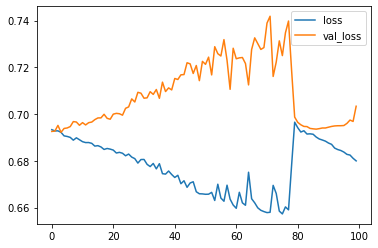

In [38]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

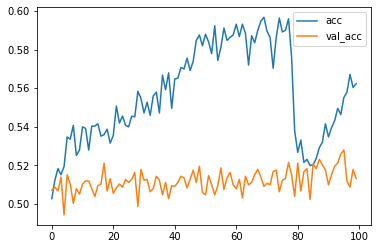

In [39]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

#### LSTM with GLOBAL MAX POOLING

In [48]:
with tf.device(tf.DeviceSpec(device_type="GPU", device_index=0)):
    inputs = np.expand_dims(X, -1)
    i = Input(shape = (T,D))
    print(inputs.shape)
    x = LSTM(5, return_sequences=True)(i)
    x = GlobalMaxPool1D()(x)
    x = Dense(1, activation = "sigmoid")(x)
    model = Model(i, x)

    model.compile(loss = "binary_crossentropy",optimizer = Adam(lr = 0.01),metrics = ["accuracy"])
    r = model.fit(inputs, Y , epochs = 100, validation_split = 0.5 )

(5000, 40, 1)
Train on 2500 samples, validate on 2500 samples
Epoch 1/100
2500/2500 [==============================] - 3s 1ms/sample - loss: 0.6955 - accuracy: 0.5164 - val_loss: 0.6951 - val_accuracy: 0.4900
Epoch 2/100
2500/2500 [==============================] - 1s 412us/sample - loss: 0.6938 - accuracy: 0.5116 - val_loss: 0.6936 - val_accuracy: 0.4852
Epoch 3/100
2500/2500 [==============================] - 1s 412us/sample - loss: 0.6939 - accuracy: 0.4940 - val_loss: 0.6934 - val_accuracy: 0.5052
Epoch 4/100
2500/2500 [==============================] - 1s 398us/sample - loss: 0.6935 - accuracy: 0.4948 - val_loss: 0.6935 - val_accuracy: 0.4956
Epoch 5/100
2500/2500 [==============================] - 1s 403us/sample - loss: 0.6938 - accuracy: 0.5020 - val_loss: 0.6939 - val_accuracy: 0.5068
Epoch 6/100
2500/2500 [==============================] - 1s 413us/sample - loss: 0.6931 - accuracy: 0.5116 - val_loss: 0.6937 - val_accuracy: 0.4956
Epoch 7/100
2500/2500 [=======================

2500/2500 [==============================] - 1s 401us/sample - loss: 0.0919 - accuracy: 0.9680 - val_loss: 0.0948 - val_accuracy: 0.9628
Epoch 56/100
2500/2500 [==============================] - 1s 414us/sample - loss: 0.0828 - accuracy: 0.9728 - val_loss: 0.0920 - val_accuracy: 0.9664
Epoch 57/100
2500/2500 [==============================] - 1s 420us/sample - loss: 0.0837 - accuracy: 0.9700 - val_loss: 0.0966 - val_accuracy: 0.9668
Epoch 58/100
2500/2500 [==============================] - 1s 409us/sample - loss: 0.0832 - accuracy: 0.9696 - val_loss: 0.1017 - val_accuracy: 0.9608
Epoch 59/100
2500/2500 [==============================] - 1s 413us/sample - loss: 0.0746 - accuracy: 0.9712 - val_loss: 0.0845 - val_accuracy: 0.9684
Epoch 60/100
2500/2500 [==============================] - 1s 410us/sample - loss: 0.0702 - accuracy: 0.9744 - val_loss: 0.1016 - val_accuracy: 0.9656
Epoch 61/100
2500/2500 [==============================] - 1s 395us/sample - loss: 0.0715 - accuracy: 0.9756 - val

In [49]:
print(T)

40


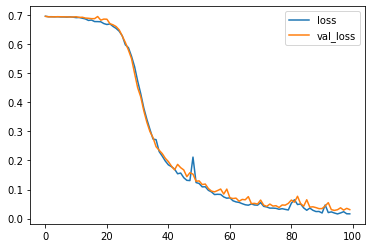

In [50]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

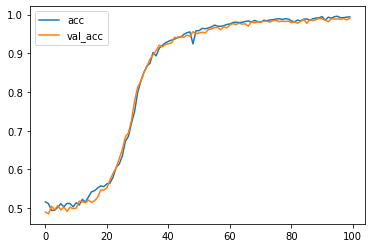

In [51]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()